In [39]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from util.mnist_reader import *

In [19]:

!gzip "data/t10k-images-idx3-ubyte"
!gzip "data/t10k-labels-idx1-ubyte"
!gzip "data/train-images-idx3-ubyte"
!gzip "data/train-labels-idx1-ubyte"

In [27]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


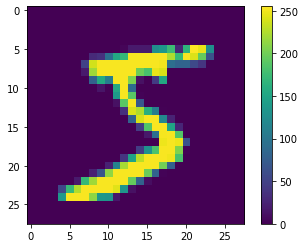

In [29]:
train_images.shape
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#Range from 0 to 255

In [36]:
#preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

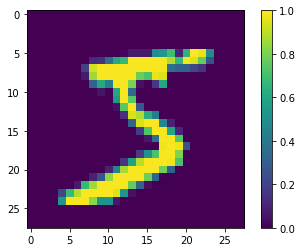

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#Should range from 0 to 1, if otherwise fix using cell above

In [45]:
train_images = train_images.reshape(-1,28, 28, 1)

test_images = test_images.reshape(-1,28, 28, 1)

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.1571 - accuracy: 0.9518 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 2/10
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 3/10
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0432 - val_accuracy: 0.9864
Epoch 4/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0291 - val_accuracy: 0.9910
Epoch 5/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0277 - val_accuracy: 0.9925
Epoch 6/10
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0340 - val_accuracy: 0.9896
Epoch 7/10
60000/60000 [==========================

In [47]:
!pip3 install h5py


In [48]:
model.save('final_model.h5')



In [49]:
model.save("mnist_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model/assets


In [51]:
test = models.load_model("mnist_model")

In [52]:
print(test.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               